<a href="https://colab.research.google.com/github/AtharvaTambat/WnCC-SoC-2022-QML/blob/main/Neural_Network_Classifying_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing the Necessary Libraries**

In [10]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


# **2. Importing MNIST Digit Dataset**

In [11]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# **3. Visualising/ Exploring the Dataset**

In [12]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


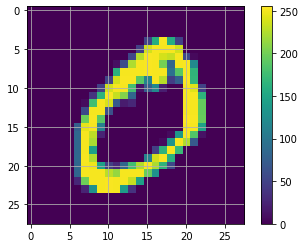

In [13]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(True)
plt.show()

# **4. Some Pre-Processing of the Training Dataset**

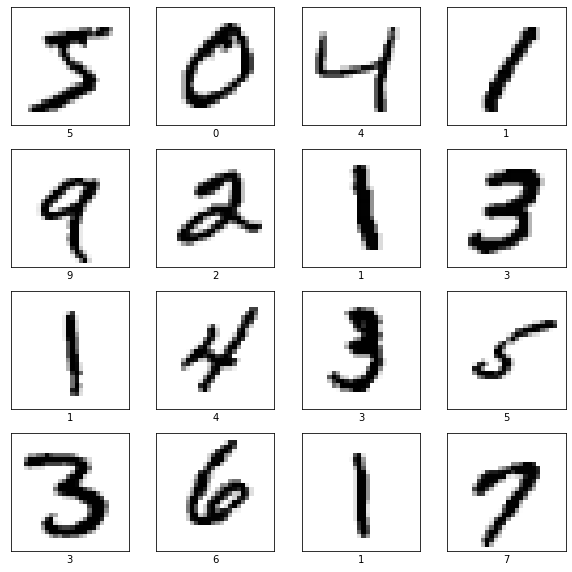

In [14]:
# Divide the input pixel brightness by 255 to scale the input values to the neural network between 0 to 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# To verify that the data is in the correct format 
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1) # Divides the plot into 4X4 subplots and goes to the (i+1)th subplot 
    plt.xticks([]) # To not display any ticks on both the axes
    plt.yticks([])
    plt.grid(False) # To not display the grid
    plt.imshow(X_train[i], cmap=plt.cm.binary) # To display the appropriate image in the (i+1)th subplot
    plt.xlabel(Y_train[i]) # To label the number shown in the (i+1)th subplot
plt.show()

# **5. Setting up the Layers**

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Transforms 2D array of the image into a 1D array 
    tf.keras.layers.Dense(128, activation='relu'), # Contains neurons with weights and biases that will be optimized by training
    tf.keras.layers.Dense(10) # Output set of neurons
])

***NOTE:***  ReLU (Rectified Linear Unit): Is an activation function used here inside the neuron (node) instead of the sigmoid function. More information about [activation = 'relu'](https://deepai.org/machine-learning-glossary-and-terms/relu)

# **6. Compiling the Model**

In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

***NOTE:*** 

1.   ***Optimizer:*** used to accelerate the gradient descent algorithm.(here, [Adam](https://www.geeksforgeeks.org/intuition-of-adam-optimizer/) is the name of the optimizer)
2.   ***Loss function:*** another name for cost function - which is to be minimized for finding the weights and the biases.
3.   ***Metrics:*** the parameter on which the performance of the algorithm will be judged. (here, the accuracy - no. of test cases it identifies correctly).



# **7. Training the model**

In [17]:
model.fit(X_train, Y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2632 - accuracy: 0.9252
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1160 - accuracy: 0.9653
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0799 - accuracy: 0.9758
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0594 - accuracy: 0.9820
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0467 - accuracy: 0.9859
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0363 - accuracy: 0.9887
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0277 - accuracy: 0.9916
Epoch 8/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0235 - accuracy: 0.9926
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0191 - accuracy: 0.9944
Epoch 10/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.015

# **8. Testing the Model on the Test-case Dataset**

In [20]:
loss, accuracy = model.evaluate(X_test,  Y_test, verbose=0)
print("Value of loss (cost) function:", loss)
print("Accuracy on test dataset:", accuracy*100, "%")

Value of loss (cost) function: 0.08755812048912048
Accuracy on test dataset: 97.93000221252441 %


# **9. Loss, accuracy.....blah, blah, blah.....not too visual, eh? See the neural network in action:** 😏



[Softmax function](https://deepai.org/machine-learning-glossary-and-terms/softmax-layer) turns the output of the last linear layer of a multi-class classification neural network into probabilities by take the exponents of each output and then normalize each number by the sum of those exponents so the entire output vector adds up to one — all probabilities should add up to one.

To implement that here, we shall add another layer of neurons (nodes) to our model.

In [21]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(X_test)

***NOTE:*** The graph will be blue when the neural network predicts correctly, and red when it doesn't.

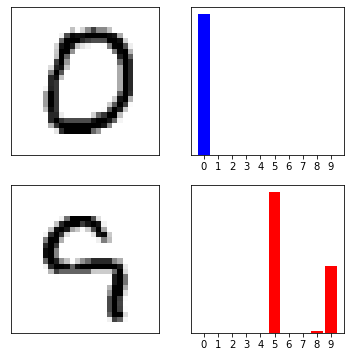

In [38]:
test_cases = [10,104]                   # Put the index of image, whose prediction you want to see. There are about 10000 ;)
plt.figure(figsize=(6,6))

for i in range(2):
  # Displaying the image of the digit
  plt.subplot(2,2,2*i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[test_cases[i]], cmap=plt.cm.binary)

  # Plotting the prediction made by the neural network
  plt.subplot(2,2,2*i+2)
  plt.xticks(range(10))
  plt.yticks([])

  if (np.argmax(predictions[test_cases[i]]) == Y_test[test_cases[i]]): 
    color="blue" 
  else: 
    color = "red"

  plt.bar(range(10), predictions[test_cases[i]], color = color)

plt.show()


**Oops!!! To err is human ..... or computer ...whatever.**

In [32]:
# To find the test case where the neural network messes up
for i in range(10000):
  if (np.argmax(predictions[i]) != Y_test[i]):
    print(i)
    break


104
